<a href="https://colab.research.google.com/github/dhanyaece/FDP/blob/main/Hyper_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/ASIET')

In [4]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.5 MB/s eta 0:00:00


**use ! symbol if you want to install or run any linux command**

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [9]:
print(tf.__version__)

2.9.2



**Import data FASION MNIST**

In [11]:
fashion_mnist=keras.datasets.fashion_mnist


(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



4422102/4422102 [==============================] - 0s 0us/step



**Scaling data to 0-1**

In [13]:


np.min(train_images)



np.max(train_images)



np.min(test_images)



np.max(test_images)



255

In [14]:


train_images = train_images/255.0
test_images = test_images/255.0



In [15]:
print("Train Minimum", np.min(train_images))
print("Train Maximum",np.max(train_images))
print("Test Minimum",np.min(test_images))
print("Test Maximum",np.max(test_images))

Train Minimum 0.0
Train Maximum 1.0
Test Minimum 0.0
Test Maximum 1.0


In [16]:


train_images[0].shape



(28, 28)

In [18]:
train_images.shape

(60000, 28, 28)

In [17]:


train_images[0]



array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

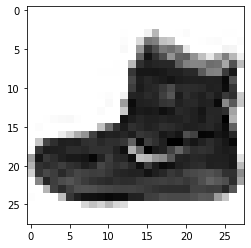

In [20]:
plt.imshow(train_images[0],cmap="binary")
plt.show()

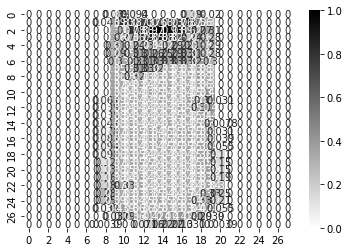

In [21]:
plt.Figure(figsize=(15,15))
sns.heatmap(train_images[2],annot=True, cmap="binary")

In [22]:
test_images.shape

(10000, 28, 28)


**Reshaping the data to feed it to CNN**

**1 represents the number of channel.. for binary number of channel is 1, for RGB it is 3**

In [23]:
train_images = train_images.reshape(len(train_images), 28,28,1)
test_images = test_images.reshape(len(test_images), 28,28,1)

In [24]:
train_images.shape

(60000, 28, 28, 1)


**Tuning function** 
hp - hyper parameter
Tuners

    RandomSearch Tuner 
    Hyperband Tuner
    BayesianOptimization Tuner 




RandomSearch concept:

    One way to find the optimal parameters is to try every possible combinations of the available parameters [Grid Search], but the number of combinations would increase exponentially as the number of hyperparameters increases. Trying all the combinations one by one takes longer to explore the hyperparameter space. Random search helps to explore more hyperparameter space in less time as compared to Grid Search. Exploring more hyperparameter space does not guarantee the absolute optimal results but close to optimal.

Hyperband Concept:

    This technique tries to remove one of the problems in random search of hyperparameters. Problem is as follows: Random search may pick some values which are very obviously bad and will do full training and evaluation on it, which is wasteful. Hyperband provides one way to solve this problem. Hyperband Solution: Randomly sample all the combinations of hyperparameter and now instead of running full training and evaluation on it, train the model for few epochs (less than max_epochs) with these combinations and select the best candidates based on the results on these few epochs. It does this iteratively and finally runs full training and evaluation on the final chosen candidates. The number of iterations done depends on parameter ‘hyperband_iterations’ and number of epochs in each iteration are less than ‘max_epochs’.

Bayesian Optimization tuner Concept:

    This techniques addresses a common problem in RandomSearch and Hyperband. Problem: All the hyperparameter combinations are chosen randomly. Choosing hyperparameters randomly helps to explore the hyperparameter space but does not guarantee absolute optimal hyperparameters. Solution provided by BayesianOptimization tuner: Instead of all combinations being random, it chooses first few randomly, then based on the performance on these hyperparameters it chooses the next best possible hyperparameters. Hence it takes into account the history of the hyperparameters which were tried. The iterations of choosing next set of hyperparameters based on history and evaluating performance continues till the tuner reaches optimal hyperparameters or exhausts maximum number of allowed trails. Maximum trials are set using parameter ‘max_trails’.



**hp.Int returns an integer value**

**filter value varies from 32 to 128**

**step size is 16 .. after 32 gives 32+16**

**[3, 5] choose 3 or 5 as random**

**eg: 32 filers of size 3 or size 5**

**then 32+16 filters of size 3 or size 5**

**for binary go for sigmoid**

**here multiple class so go for softmax**

**adam is adaptive optimization.. so that step size can be changed**

**hp.Choice represent tuning parameters**

In [25]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [26]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

<ipython-input-26-2bbfbe7dae29>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


**objective is to check for maximum validation accuracy**

**values will be stored in output/Mnist Fashion**

In [27]:
from kerastuner.engine.hyperparameters import HyperParameters

tuner_search = RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Fashion")



**search function search for best validation accuracy.. **

In [28]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 00m 29s]
val_accuracy: 0.9120000004768372

Best val_accuracy So Far: 0.9120000004768372
Total elapsed time: 00h 02m 54s


**TO get the best model**

In [29]:


model=tuner_search.get_best_models(num_models=1)[0]



In [30]:


model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 80)        800       
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        128064    
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 80)                2478160   
                                                                 
 dense_1 (Dense)             (None, 10)                810       
                                                                 
Total params: 2,607,834
Trainable params: 2,607,834
Non-trainable params: 0
_________________________________________________________________


**initial epoch is three as we have already trained the model for 3 epochs**

In [31]:


model.fit(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=3)



Epoch 4/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1368 - accuracy: 0.9489 - val_loss: 0.2601 - val_accuracy: 0.9147
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0965 - accuracy: 0.9639 - val_loss: 0.3044 - val_accuracy: 0.9125
Epoch 6/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0700 - accuracy: 0.9743 - val_loss: 0.3044 - val_accuracy: 0.9128
Epoch 7/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0490 - accuracy: 0.9817 - val_loss: 0.3374 - val_accuracy: 0.9153
Epoch 8/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0374 - accuracy: 0.9858 - val_loss: 0.4118 - val_accuracy: 0.9120
Epoch 9/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0309 - accuracy: 0.9885 - val_loss: 0.4545 - val_accuracy: 0.9092
Epoch 10/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0240 - accuracy: 0.9919 - val_loss: 0.5843 - val_accur

In [32]:


loss, accuracy = model.evaluate(test_images, test_labels)



313/313 [==============================] - 1s 3ms/step - loss: 0.5977 - accuracy: 0.9107




**tuner_search.results_summary() to find the results in all trials**


**here score is not accuracy**



In [33]:


tuner_search.results_summary()



Results summary
Results in output/Mnist Fashion
Showing 10 best trials
Trial summary
Hyperparameters:
conv_1_filter: 80
conv_1_kernel: 3
conv_2_filter: 64
conv_2_kernel: 5
dense_1_units: 80
learning_rate: 0.001
Score: 0.9120000004768372
Trial summary
Hyperparameters:
conv_1_filter: 64
conv_1_kernel: 3
conv_2_filter: 32
conv_2_kernel: 5
dense_1_units: 80
learning_rate: 0.001
Score: 0.9116666913032532
Trial summary
Hyperparameters:
conv_1_filter: 80
conv_1_kernel: 5
conv_2_filter: 64
conv_2_kernel: 3
dense_1_units: 32
learning_rate: 0.01
Score: 0.871833324432373
Trial summary
Hyperparameters:
conv_1_filter: 48
conv_1_kernel: 5
conv_2_filter: 48
conv_2_kernel: 3
dense_1_units: 80
learning_rate: 0.01
Score: 0.8600000143051147
Trial summary
Hyperparameters:
conv_1_filter: 128
conv_1_kernel: 5
conv_2_filter: 48
conv_2_kernel: 5
dense_1_units: 112
learning_rate: 0.01
Score: 0.8513333201408386


**Can change the step size, kernel size manually** 

**giver different name tuner_search1 or 2**